# Варіант 1

$$\begin{equation*}
 \begin{cases}
   4.2 x_1 + 10 x_2 = 136,
   \\
   –10.1 x_1 + 13.8 x_2 = 132,
   \\
   18.3 x_1 – 7.6 x_2 = 108.
 \end{cases}
\end{equation*}$$

In [96]:
import math

import matplotlib.pyplot as plt
import numpy as np

In [97]:
plt.style.use('seaborn-v0_8-whitegrid')

In [98]:
coef = np.array([
    [4.2, 10],
    [-10.1, 13.8],
    [18.3, -7.6]
])

const = np.array([136, 132, 108])

def get_x2_by_x1(num, x1):
    return (const[num] - coef[num, 0] * x1) / coef[num, 1]

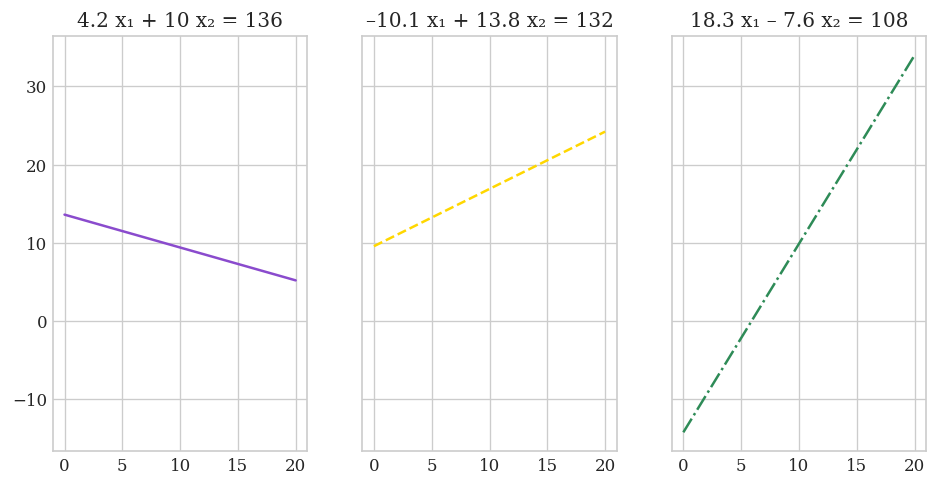

In [99]:
linestyles = np.array(['-', '--', '-.'])
colors = np.array(['#8A4BCD', '#FFD700', '#2E8B57'])
descriptions = np.array(['4.2 x\u2081 + 10 x\u2082 = 136', '–10.1 x\u2081 + 13.8 x\u2082 = 132', '18.3 x\u2081 – 7.6 x\u2082 = 108'])
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif']
fig, ax = plt.subplots(1, 3, sharey=True)
fig.tight_layout()
x = np.linspace(0, 20, num=10)
for i, ax_i in enumerate(ax):
    ax_i.set_title(descriptions[i])
    ax_i.plot(x, get_x2_by_x1(i, x), color=colors[i], linestyle=linestyles[i])

2.4078947368421044
[13.6        12.66666667 11.73333333 10.8         9.86666667 12.54385965
 17.89473684 23.24561404 28.59649123 33.94736842]


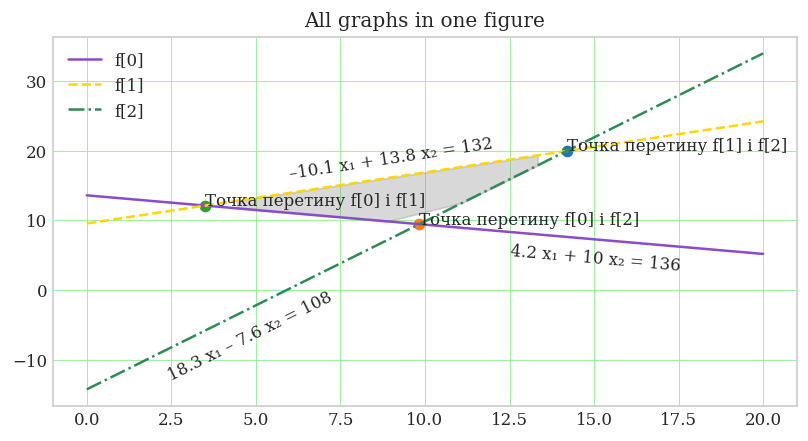

In [100]:
labels = np.array(['f[0]', 'f[1]', 'f[2]'])
plt.grid(color='#90EE90', linestyle='-', linewidth=0.5)
for i in range(coef.shape[0]):
    plt.plot(x, get_x2_by_x1(i, x), color=colors[i], linestyle=linestyles[i], label=labels[i])

plt.text(12.5, 5, descriptions[0], fontsize=10, rotation=np.arctan(get_x2_by_x1(0, 1) - get_x2_by_x1(0, 0)) * 180 / math.pi, rotation_mode='anchor', transform_rotates_text=True)
plt.text(6, 16, descriptions[1], fontsize=10, rotation=np.arctan(get_x2_by_x1(1, 1) - get_x2_by_x1(1, 0)) * 180 / math.pi, rotation_mode='anchor', transform_rotates_text=True)
plt.text(2.5, -13, descriptions[2], fontsize=10, rotation=np.arctan(get_x2_by_x1(2, 1) - get_x2_by_x1(2, 0)) * 180 / math.pi, rotation_mode='anchor', transform_rotates_text=True)
print(get_x2_by_x1(2, 1) - get_x2_by_x1(2, 0))
plt.legend()
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 120

solves = []
for i in range(coef.shape[0]):
    solve = np.linalg.solve(np.delete(coef, i, 0), np.delete(const, i, 0))
    plt.scatter(solve[0], solve[1])
    solves.append(solve)
plt.annotate("Точка перетину f[1] і f[2]", (solves[0][0], solves[0][1]))
plt.annotate("Точка перетину f[0] і f[2]", (solves[1][0], solves[1][1]))
plt.annotate("Точка перетину f[0] і f[1]", (solves[2][0], solves[2][1]))
plt.title('All graphs in one figure')
def max_x2(x1):
    return np.maximum(get_x2_by_x1(0, x1), get_x2_by_x1(2, x1))

print(max_x2(x))
plt.fill_between(x, get_x2_by_x1(1, x), max_x2(x), color='gray', alpha=0.3, where=get_x2_by_x1(1, x) >= max_x2(x))
plt.show()